In [1]:
from sklearn.datasets import fetch_lfw_people #人脸数据
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
faces=fetch_lfw_people(min_faces_per_person=60)

In [3]:
faces.images.shape
#1348是矩阵中图像的个数 
#62：是每个图像的特征矩阵的行
#47 是每个图像矩阵的列

(1348, 62, 47)

In [4]:
faces.data.shape

(1348, 2914)

In [5]:
X=faces.data
X

array([[138.        , 135.66667   , 127.666664  , ...,   1.6666666 ,
          1.6666666 ,   0.33333334],
       [ 71.333336  ,  56.        ,  67.666664  , ..., 247.66667   ,
        243.        , 238.33333   ],
       [ 84.333336  ,  97.333336  ,  72.333336  , ..., 114.        ,
        194.33333   , 241.        ],
       ...,
       [ 29.333334  ,  29.        ,  29.333334  , ..., 145.        ,
        147.        , 141.66667   ],
       [ 49.333332  ,  55.666668  ,  76.666664  , ..., 186.33333   ,
        176.33333   , 161.        ],
       [ 31.        ,  26.333334  ,  28.        , ...,  34.        ,
         42.        ,  69.666664  ]], dtype=float32)

In [6]:
#可视化

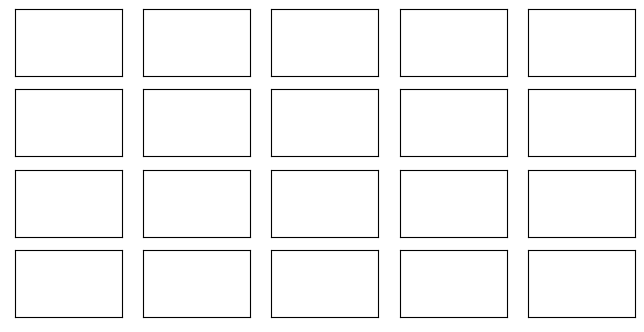

In [7]:
#创建画布和子图像
fig,axes=plt.subplots(4,5#多少张画布 几行几列
                    ,figsize=(8,4)#画布尺寸和比例
                    ,subplot_kw={"xticks":[],"yticks":[]}#不要显示坐标
                    )


In [8]:
axes#axes中的一个对象对应fig中的一个空格

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

In [9]:
axes.shape

(4, 5)

In [10]:
enumerate(axes.flat)
for i,ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:]
              ,cmap="gray"     
            )

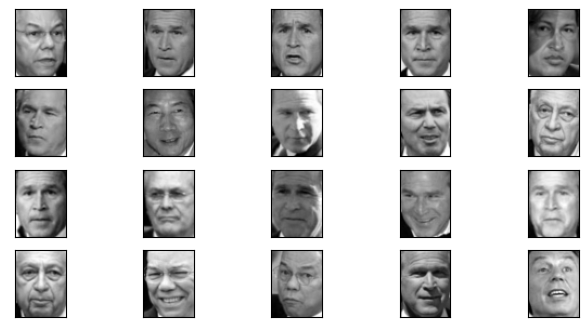

In [11]:
fig

In [12]:
pca=PCA(150).fit(X)


In [13]:
v=pca.components_


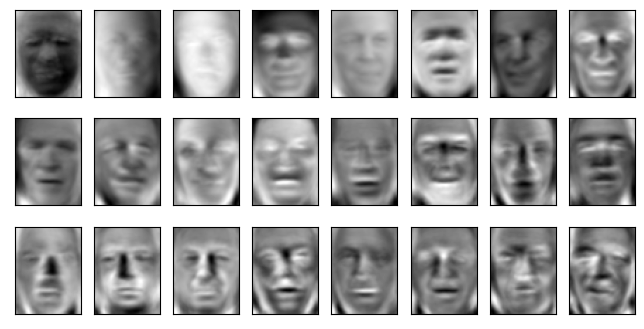

In [14]:
fig, axes = plt.subplots(3,8,figsize=(8,4),subplot_kw = {"xticks":[],"yticks":[]})
for i, ax in enumerate(axes.flat):
   ax.imshow(v[i,:].reshape(62,47),cmap="gray")

In [15]:
#重要接口inverse_transform

In [16]:
from sklearn.datasets import fetch_lfw_people #人脸数据
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [17]:
faces=fetch_lfw_people(min_faces_per_person=60)
faces.images.shape
faces.data.shape
X=faces.data

In [18]:
pca=PCA(50)
X_dr=pca.fit_transform(X)
X_dr.shape

(1348, 50)

In [19]:
#还原
inverse=pca.inverse_transform(X_dr)

In [20]:
inverse.shape

(1348, 2914)

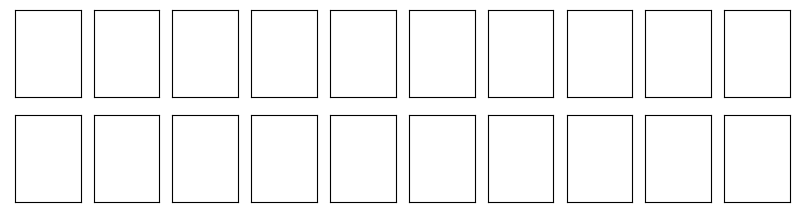

In [21]:
fig,axe=plt.subplots(2,10,figsize=(10,2.5)
,subplot_kw={"xticks":[],"yticks":[]}
)

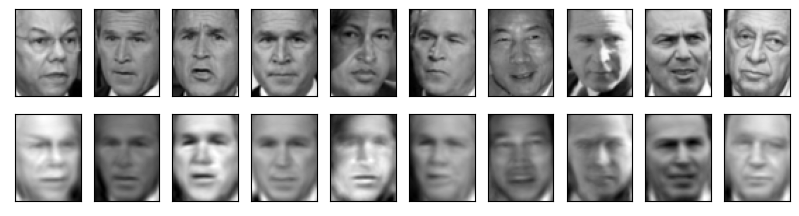

In [22]:
for i in range(10):
    axe[0,i].imshow(faces.images[i,:,:],cmap="binary_r")
    axe[1,i].imshow(inverse[i].reshape(62,47),cmap="binary_r")
    
fig

In [23]:
#使用pca做噪音过滤

In [24]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [25]:
digits=load_digits()

In [26]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [27]:
set(digits.target.tolist())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

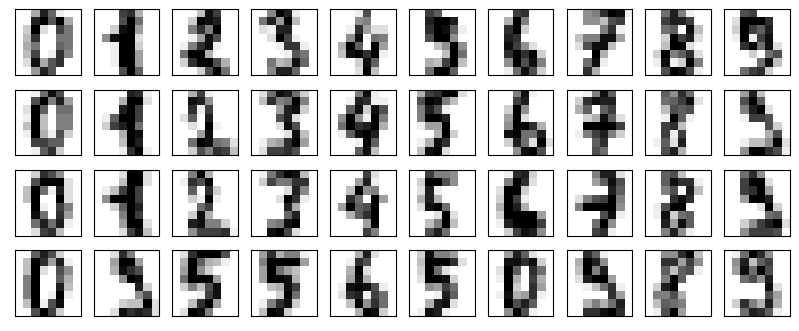

In [28]:
def plot_digits(data):
         fig,axes=plt.subplots(4,10,figsize=(10,4)
                    ,subplot_kw={"xticks":[],"yticks":[]})

         for i,ax in enumerate(axes.flat):
                  ax.imshow(data[i].reshape(8,8),cmap="binary")
plot_digits(digits.data)

In [29]:
#添加噪音
import numpy as np

rng=np.random.RandomState(42)
#在指定的数据集中，随机抽取服从正态分布的数据
#两个参数，分别是指定的数据集，和抽取出来的正太分布的方差
noisy=np.random.normal(digits.data,2)


In [30]:
noisy.shape

(1797, 64)

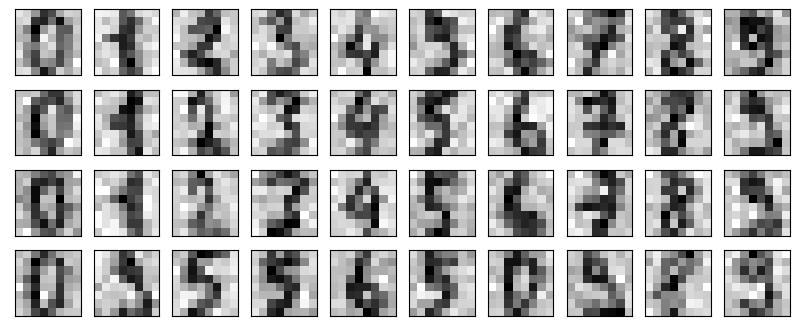

In [31]:
plot_digits(noisy)

In [32]:
#降噪先降维
pca=PCA(50).fit(noisy)
X_dr=PCA(0.5,svd_solver="full").fit(noisy)

In [33]:
pca=PCA(0.5,svd_solver="full").fit(noisy)
X_dr=pca.transform(noisy)

In [34]:
X_dr.shape

(1797, 6)

In [35]:
X_dr

array([[  0.13317156,  22.45466228,  -9.77510966,  15.51332845,
         -7.13136796,  -4.91109284],
       [  7.00906883, -18.87260075,   4.56001196, -17.94575976,
          6.34011808,  -6.17663578],
       [  3.62499888,  -8.2860044 ,   1.2980632 , -12.18941448,
        -17.58318893,  -7.73632619],
       ...,
       [ 10.05602265,  -7.56966667,  11.65387721,  -6.77014347,
         -4.58752912, -16.14502817],
       [ -4.26031947,  10.20369918,  -8.88432542,  -7.45510753,
          5.33918034,   0.92958961],
       [ -1.06652666,   7.35169222,  12.64595656,  -6.36768341,
         -1.54463267,  -1.98033529]])

In [36]:
with_noisy=pca.inverse_transform(X_dr)#还原

In [37]:
with_noisy.shape

(1797, 64)

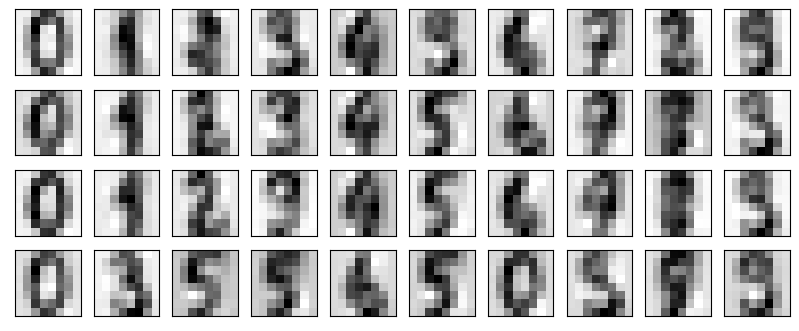

In [38]:
plot_digits(with_noisy)#一定程度上降噪